<a href="https://colab.research.google.com/github/MikolajKasprzyk/the_office/blob/main/the_office.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path_in = '/content/drive/MyDrive/Colab Notebooks/the_office/'
path_out ='/content/drive/MyDrive/Colab Notebooks/the_office/viz_files'

lines_raw = pd.read_csv(path_in + 'the_office_lines.csv')
episodes_raw = pd.read_csv(path_in + 'the_office_episodes.csv')
imdb_raw = pd.read_csv(path_in + 'the_office_imdb.csv')

In [9]:
lines_raw[lines_raw['line'].str.contains('what she said', case=False)]

,season,episode,title,scene,speaker,line,Unnamed: 6
1885,2,2,Sexual Harassment,306,Michael,That's what she said. Pam?,NaN
1931,2,2,Sexual Harassment,316,Jim,Does that include 'That's What She Said'?,NaN
1934,2,2,Sexual Harassment,316,Michael,THAT'S WHAT SHE SAID!,NaN
3965,2,10,Christmas Party,621,Michael,"A, that's what she said, and B, I wanted it to...",NaN
4777,2,12,The Injury,752,Dwight,That's what she said.,NaN
5825,2,17,Dwight's Speech,953,Michael,That's what she said!,NaN
6799,2,21,Conflict Resolution,1128,Michael,"That's what she said. The thing is, Angela......",NaN
7450,3,1,Gay Witch Hunt,1264,Michael,I am glad that today spurred social change. Th...,NaN
9996,3,10,A Benihana Christmas (Parts 1&2),1683,Michael,Oh. That's what she said.,NaN
10563,3,13,Traveling Salesmen,1781,Dwight,That's what she said.,NaN


In [132]:
episodes_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   season                 201 non-null    int64  
 1   episode_num_in_season  201 non-null    int64  
 2   episode_num_overall    201 non-null    int64  
 3   title                  201 non-null    object 
 4   directed_by            201 non-null    object 
 5   written_by             201 non-null    object 
 6   original_air_date      201 non-null    object 
 7   prod_code              201 non-null    int64  
 8   us_viewers             201 non-null    float64
dtypes: float64(1), int64(4), object(4)
memory usage: 14.3+ KB


In [133]:
imdb_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             188 non-null    int64  
 1   episode_num        188 non-null    int64  
 2   title              188 non-null    object 
 3   original_air_date  188 non-null    object 
 4   imdb_rating        188 non-null    float64
 5   total_votes        188 non-null    int64  
 6   desc               188 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 10.4+ KB


In [134]:
episodes_raw.tail()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
196,9,21,197,Livin' the Dream,Jeffrey Blitz,Niki Schwartz-Wright,2013-05-02,9021,3510000.0
197,9,22,198,A.A.R.M.,David Rogers,Brent Forrester,2013-05-09,9022,4560000.0
198,9,23,199,A.A.R.M.,David Rogers,Brent Forrester,2013-05-09,9023,4560000.0
199,9,24,200,Finale,Ken Kwapis,Greg Daniels,2013-05-16,9024,5690000.0
200,9,25,201,Finale,Ken Kwapis,Greg Daniels,2013-05-16,9025,5690000.0


In [135]:
temp_episodes_episodes = pd.DataFrame(episodes_raw.groupby(by='season')['episode_num_in_season'].unique())
temp_episodes_episodes

,episode_num_in_season
season,
1,"[1, 2, 3, 4, 5, 6]"
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


In [136]:
temp_imdb_episodes = pd.DataFrame(imdb_raw.groupby(by='season')['episode_num'].unique())
temp_imdb_episodes

,episode_num
season,
1,"[1, 2, 3, 4, 5, 6]"
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]"
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


# Clean episodes dataset

In [137]:
episodes_raw[episodes_raw.duplicated(subset='original_air_date')]

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
38,3,11,39,A Benihana Christmas,Harold Ramis,Jennifer Celotta,2006-12-14,3014,8440000.0
52,3,25,53,The Job,Ken Kwapis,Paul Lieberstein & Michael Schur,2007-05-17,3024,7880000.0
54,4,2,55,Fun Run,Greg Daniels,Greg Daniels,2007-09-27,4002,9700000.0
56,4,4,57,Dunder Mifflin Infinity,Craig Zisk,Michael Schur,2007-10-04,4004,8490000.0
58,4,6,59,Launch Party,Ken Whittingham,Jennifer Celotta,2007-10-11,4006,8910000.0
60,4,8,61,Money,Paul Lieberstein,Paul Lieberstein,2007-10-18,4008,8500000.0
71,4,19,72,"Goodbye, Toby",Paul Feig,Jennifer Celotta & Paul Lieberstein,2008-05-15,4019,8070000.0
73,5,2,74,Weight Loss,Paul Feig,Lee Eisenberg & Gene Stupnitsky,2008-09-25,5002,9200000.0
86,5,15,87,Stress Relief,Jeffrey Blitz,Paul Lieberstein,2009-02-01,5017,22910000.0
94,5,23,95,Michael Scott Paper Company,Gene Stupnitsky,Justin Spitzer,2009-04-09,5023,7940000.0


In [138]:
# in this dataframe some episodes are divided no two, those are special longer episodes
# in other dataframes they are treated as one. if air date is same i will treat them as one
# as i found out later in project there are episodes with the same title,
# part 1 and 2 suffix and the same air date, there are separate episodes with
# the same air date but different titlte and part 1 and 2 suffixes and
# different air date. to be concistent through dataframe episodes with the same
# air date and part 1 and 2 suffixes will be treated as one episode
episodes = episodes_raw.copy()
episodes = episodes.drop(columns=['prod_code'])
# add column with first 5 characters in title
episodes['title_first_5'] = episodes['title'].str[:5]
episodes = episodes.drop_duplicates(subset=['original_air_date', 'title_first_5'])
episodes.reset_index(inplace=True, drop=True)
episodes = episodes.drop(columns='title_first_5')

In [139]:
# resetting numbering of episodes in every season
episodes = episodes.sort_values(by=['season', 'episode_num_in_season'])
episodes['episode_num_in_season'] = episodes.groupby('season').cumcount() + 1
episodes['episode_num_overall'] = episodes.index + 1

# Clean IMDB dataset

In [140]:
imdb_raw.head()

,season,episode_num,title,original_air_date,imdb_rating,total_votes,desc
0,1,1,Pilot,2005-03-24,7.4,7006,The premiere episode introduces the boss and s...
1,1,2,Diversity Day,2005-03-29,8.3,6902,Michael's off color remark puts a sensitivity ...
2,1,3,Health Care,2005-04-05,7.7,5756,Michael leaves Dwight in charge of picking the...
3,1,4,The Alliance,2005-04-12,8.0,5579,"Just for a laugh, Jim agrees to an alliance wi..."
4,1,5,Basketball,2005-04-19,8.4,6183,Michael and his staff challenge the warehouse ...


In [141]:
imdb_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             188 non-null    int64  
 1   episode_num        188 non-null    int64  
 2   title              188 non-null    object 
 3   original_air_date  188 non-null    object 
 4   imdb_rating        188 non-null    float64
 5   total_votes        188 non-null    int64  
 6   desc               188 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 10.4+ KB


In [142]:
imdb_raw.isna().sum()

season               0
episode_num          0
title                0
original_air_date    0
imdb_rating          0
total_votes          0
desc                 0
dtype: int64

In [143]:
imdb_raw.duplicated().sum()

0

In [144]:
imdb = imdb_raw.copy()
imdb = imdb.drop(columns=['desc'])
imdb[imdb.duplicated(subset='original_air_date')]

,season,episode_num,title,original_air_date,imdb_rating,total_votes
85,5,21,Michael Scott Paper Company,2009-04-09,8.7,3946
95,6,5,Niagara: Part 2,2009-10-08,9.5,5122
108,6,18,The Delivery: Part 2,2010-03-04,8.5,3445
178,9,14,Vandalism,2013-01-31,7.4,2774


In [145]:
# delete duplicated episodes, reset numbering
imdb['title_first_5'] = imdb['title'].str[:5]
imdb = imdb.drop_duplicates(subset=['original_air_date', 'title_first_5'])
imdb.reset_index(inplace=True, drop=True)
imdb = imdb.sort_values(by=['season', 'episode_num'])
imdb['episode_num'] = imdb.groupby('season').cumcount() + 1
imdb = imdb.drop(columns=['title_first_5'])

# Check, unify names and merge



In [146]:
imdb.head()

,season,episode_num,title,original_air_date,imdb_rating,total_votes
0,1,1,Pilot,2005-03-24,7.4,7006
1,1,2,Diversity Day,2005-03-29,8.3,6902
2,1,3,Health Care,2005-04-05,7.7,5756
3,1,4,The Alliance,2005-04-12,8.0,5579
4,1,5,Basketball,2005-04-19,8.4,6183


In [147]:
episodes.head()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,us_viewers
0,1,1,1,Pilot,Ken Kwapis,Ricky Gervais & Stephen Merchant and Greg Daniels,2005-03-24,11200000.0
1,1,2,2,Diversity Day,Ken Kwapis,B. J. Novak,2005-03-29,6000000.0
2,1,3,3,Health Care,Ken Whittingham,Paul Lieberstein,2005-04-05,5800000.0
3,1,4,4,The Alliance,Bryan Gordon,Michael Schur,2005-04-12,5400000.0
4,1,5,5,Basketball,Greg Daniels,Greg Daniels,2005-04-19,5000000.0


In [148]:
print(episodes.columns)
print(imdb_raw.columns)

Index(['season', 'episode_num_in_season', 'episode_num_overall', 'title',
       'directed_by', 'written_by', 'original_air_date', 'us_viewers'],
      dtype='object')
Index(['season', 'episode_num', 'title', 'original_air_date', 'imdb_rating',
       'total_votes', 'desc'],
      dtype='object')


In [149]:
# unify column names
episodes.columns = ['season', 'episode_num', 'episode_num_overall', 'title_episodes',
       'directed', 'written', 'original_air_date',
       'us_viewers']

In [150]:
# check if those dataframes (unique values of episodes per season) are the same
temp_imdb_episodes = pd.DataFrame(imdb.groupby(by='season')['episode_num'].unique())
temp_episodes_episodes = pd.DataFrame(episodes.groupby(by='season')['episode_num'].unique())
print(temp_imdb_episodes.equals(temp_episodes_episodes))

True


In [151]:
# merge
episodes_imdb = imdb.merge(episodes, on=['season', 'episode_num'], how='left')
episodes_imdb.head()

,season,episode_num,title,original_air_date_x,imdb_rating,total_votes,episode_num_overall,title_episodes,directed,written,original_air_date_y,us_viewers
0,1,1,Pilot,2005-03-24,7.4,7006,1,Pilot,Ken Kwapis,Ricky Gervais & Stephen Merchant and Greg Daniels,2005-03-24,11200000.0
1,1,2,Diversity Day,2005-03-29,8.3,6902,2,Diversity Day,Ken Kwapis,B. J. Novak,2005-03-29,6000000.0
2,1,3,Health Care,2005-04-05,7.7,5756,3,Health Care,Ken Whittingham,Paul Lieberstein,2005-04-05,5800000.0
3,1,4,The Alliance,2005-04-12,8.0,5579,4,The Alliance,Bryan Gordon,Michael Schur,2005-04-12,5400000.0
4,1,5,Basketball,2005-04-19,8.4,6183,5,Basketball,Greg Daniels,Greg Daniels,2005-04-19,5000000.0


In [152]:
# check if titles are the same, if so it looks fine
episodes_imdb[episodes_imdb['title'] != episodes_imdb['title_episodes']]

,season,episode_num,title,original_air_date_x,imdb_rating,total_votes,episode_num_overall,title_episodes,directed,written,original_air_date_y,us_viewers


In [153]:
episodes_imdb = episodes_imdb.drop(columns=['title_episodes',
                                            'original_air_date_y']).\
                rename(columns={'episode_num':'episode',
                                'original_air_date_x':'air_date',
                                'total_votes':'votes',
                                'imdb_rating':'rating'})
episodes_imdb.head()

,season,episode,title,air_date,rating,votes,episode_num_overall,directed,written,us_viewers
0,1,1,Pilot,2005-03-24,7.4,7006,1,Ken Kwapis,Ricky Gervais & Stephen Merchant and Greg Daniels,11200000.0
1,1,2,Diversity Day,2005-03-29,8.3,6902,2,Ken Kwapis,B. J. Novak,6000000.0
2,1,3,Health Care,2005-04-05,7.7,5756,3,Ken Whittingham,Paul Lieberstein,5800000.0
3,1,4,The Alliance,2005-04-12,8.0,5579,4,Bryan Gordon,Michael Schur,5400000.0
4,1,5,Basketball,2005-04-19,8.4,6183,5,Greg Daniels,Greg Daniels,5000000.0


In [154]:
episodes_imdb.reset_index(inplace=True, drop=True)
episodes_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   season               186 non-null    int64  
 1   episode              186 non-null    int64  
 2   title                186 non-null    object 
 3   air_date             186 non-null    object 
 4   rating               186 non-null    float64
 5   votes                186 non-null    int64  
 6   episode_num_overall  186 non-null    int64  
 7   directed             186 non-null    object 
 8   written              186 non-null    object 
 9   us_viewers           186 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 14.7+ KB


# Cleaning lines dataset

In [155]:
lines_raw.head()

,season,episode,title,scene,speaker,line,Unnamed: 6
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...,NaN
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So...",NaN
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...,NaN
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah.",NaN
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done.",NaN


In [156]:
lines_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54626 entries, 0 to 54625
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      54626 non-null  int64 
 1   episode     54626 non-null  int64 
 2   title       54626 non-null  object
 3   scene       54626 non-null  int64 
 4   speaker     54626 non-null  object
 5   line        54626 non-null  object
 6   Unnamed: 6  17 non-null     object
dtypes: int64(3), object(4)
memory usage: 2.9+ MB


In [157]:
# not really sure what this column is but just drop it as it is not significiant
# amount of data anyway
lines_raw[lines_raw['Unnamed: 6'].notna()]

,season,episode,title,scene,speaker,line,Unnamed: 6
3505,2,8,Performance Review,565,Jan,I'm good,how are you?
3645,2,8,Performance Review,578,Jan,I'm heading back to New York,Alan and I will conduct your performance revi...
3666,2,8,Performance Review,579,Michael,Jan is not in a place where she feels she can ...,I'm good. I can go home now.
3913,2,9,E-Mail Surveillance,610,Kelly,I'm sorry guys,can we please not talk about paper? There's g...
8711,3,6,Diwali,1489,Pam,You say one more word,I'm stopping the car.
8883,3,7,Branch Closing,1526,Phyllis,We know the branch is closing,Michael told us.
15482,4,7,Money (Parts 1&2),2597,Darryl,I have my daughter tonight,we're renting Charlotte's Web.
19220,5,4,Baby Shower,3195,Oscar,She's got an Orbit,that's a twelve hundred dollar stroller.
20859,5,9,Frame Toby,3397,Ryan,That was your choice,don't put that on me. I'm just going on a lit...
21140,5,10,The Surplus,3421,Dwight,My... It's not my fault you don't understand G...,I've been telling you to take it for years!


In [158]:
lines = lines_raw.copy()
lines = lines.drop(columns=['Unnamed: 6'])
lines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54626 entries, 0 to 54625
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   season   54626 non-null  int64 
 1   episode  54626 non-null  int64 
 2   title    54626 non-null  object
 3   scene    54626 non-null  int64 
 4   speaker  54626 non-null  object
 5   line     54626 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.5+ MB


In [159]:
# check if episodes and seasons are the same as episodes_imdb dataframe
temp_lines_episodes = pd.DataFrame(lines.groupby(by='season')['episode'].unique())
temp_lines_episodes

,episode
season,
1,"[1, 2, 3, 4, 5, 6]"
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15..."
4,"[1, 3, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17..."
5,"[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1..."
6,"[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1..."
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15..."
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


In [160]:
temp_episodes_imdb = pd.DataFrame(episodes_imdb.groupby(by='season')['episode'].unique())
temp_episodes_imdb

,episode
season,
1,"[1, 2, 3, 4, 5, 6]"
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]"
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


In [161]:
# some of numbers in episodes numbering were skipped, like in here
pd.DataFrame(lines[lines['season'] == 1]).groupby(by='episode')['title'].unique()

episode
1            [Pilot]
2    [Diversity Day]
3      [Health Care]
4     [The Alliance]
5       [Basketball]
6         [Hot Girl]
Name: title, dtype: object

In [162]:
# fixing episodes numbering using titles column
def fix_episode_number(group):
    last_title = ''
    counter = 0
    numbering_fixed = []
    for idx, row in group.iterrows():
        title = row['title']
        if title != last_title:
            counter += 1
        numbering_fixed.append(counter)
        last_title = title
    group['episode'] = numbering_fixed
    return group

lines = lines.groupby(['season']).apply(fix_episode_number)

<ipython-input-162-c38a0c92ca86>:15: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  lines = lines.groupby(['season']).apply(fix_episode_number)


In [163]:
# numbering is in order
temp_lines = pd.DataFrame(lines.groupby(by='season')['episode'].unique())
temp_lines

,episode
season,
1,"[1, 2, 3, 4, 5, 6]"
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]"
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


In [164]:
temp_episodes_imdb = pd.DataFrame(episodes_imdb.groupby(by='season')['episode'].unique())
temp_episodes_imdb

,episode
season,
1,"[1, 2, 3, 4, 5, 6]"
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]"
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


In [165]:
temp_episodes_imdb['episode'] = temp_episodes_imdb['episode'].apply(tuple)
temp_lines['episode'] = temp_lines['episode'].apply(tuple)

# Compare the dataframes and get the differences
temp_episodes_imdb.compare(temp_lines, keep_equal=False)

season


In [166]:
lines.reset_index(inplace=True, drop=True)

#Sentiment analysis using TextBlob

In [168]:
from textblob import TextBlob
def get_sentiment_score(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# sentiment analysis and add new columns to the lines lines
lines['sentiment_score'] = lines['line'].apply(get_sentiment_score)

In [169]:
lines.head()

,season,episode,title,scene,speaker,line,sentiment_score
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...,0.597857
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So...",0.000000
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...,0.000000
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah.",0.000000
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done.",0.285714


In [332]:
# Get the top 10 speakers based on their occurrence counts
top_10 = lines['speaker'].value_counts().nlargest(10).index

# keep only the rows with speakers in the 'top_10' list
lines = lines[lines['speaker'].isin(top_10)]

In [333]:
top_30

Index(['Michael', 'Dwight', 'Jim', 'Pam', 'Andy', 'Kevin', 'Angela', 'Erin',
       'Oscar', 'Ryan', 'Darryl', 'Phyllis', 'Kelly', 'Toby', 'Jan', 'Stanley',
       'Meredith', 'Holly', 'Nellie', 'Gabe', 'Robert', 'Creed', 'David',
       'Karen', 'Clark', 'Charles', 'Roy', 'Pete', 'Jo', 'Deangelo'],
      dtype='object')

In [334]:
office_df = lines.merge(episodes_imdb, how='left', on=['season', 'episode'])

In [335]:
office_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39418 entries, 0 to 39417
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   season               39418 non-null  int64  
 1   episode              39418 non-null  int64  
 2   title_x              39418 non-null  object 
 3   scene                39418 non-null  int64  
 4   speaker              39418 non-null  object 
 5   line                 39418 non-null  object 
 6   sentiment_score      39418 non-null  float64
 7   title_y              39418 non-null  object 
 8   air_date             39418 non-null  object 
 9   rating               39418 non-null  float64
 10  votes                39418 non-null  int64  
 11  episode_num_overall  39418 non-null  int64  
 12  directed             39418 non-null  object 
 13  written              39418 non-null  object 
 14  us_viewers           39418 non-null  float64
dtypes: float64(3), int64(5), object(7)
m

In [336]:
office_df.head()

,season,episode,title_x,scene,speaker,line,sentiment_score,title_y,air_date,rating,votes,episode_num_overall,directed,written,us_viewers
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...,0.597857,Pilot,2005-03-24,7.4,7006,1,Ken Kwapis,Ricky Gervais & Stephen Merchant and Greg Daniels,11200000.0
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So...",0.000000,Pilot,2005-03-24,7.4,7006,1,Ken Kwapis,Ricky Gervais & Stephen Merchant and Greg Daniels,11200000.0
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...,0.000000,Pilot,2005-03-24,7.4,7006,1,Ken Kwapis,Ricky Gervais & Stephen Merchant and Greg Daniels,11200000.0
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah.",0.000000,Pilot,2005-03-24,7.4,7006,1,Ken Kwapis,Ricky Gervais & Stephen Merchant and Greg Daniels,11200000.0
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done.",0.285714,Pilot,2005-03-24,7.4,7006,1,Ken Kwapis,Ricky Gervais & Stephen Merchant and Greg Daniels,11200000.0


In [337]:
office_df = office_df.drop(columns=['scene', 'title_y'])
office_df = office_df.rename(columns={'title_x':'title'})

In [338]:
sentiment_by_episode = pd.DataFrame(office_df.groupby(by=['season', 'episode', 'episode_num_overall'])['sentiment_score'].mean())
sentiment_by_episode.reset_index(inplace=True)

sentiment_by_episode['rolling_avg'] = sentiment_by_episode['sentiment_score'].rolling(window=5, min_periods=1).mean()

In [339]:
sentiment_by_episode.head()

,season,episode,episode_num_overall,sentiment_score,rolling_avg
0,1,1,1,0.102062,0.102062
1,1,2,2,0.137915,0.119989
2,1,3,3,0.102472,0.114150
3,1,4,4,0.139774,0.120556
4,1,5,5,0.090940,0.114633


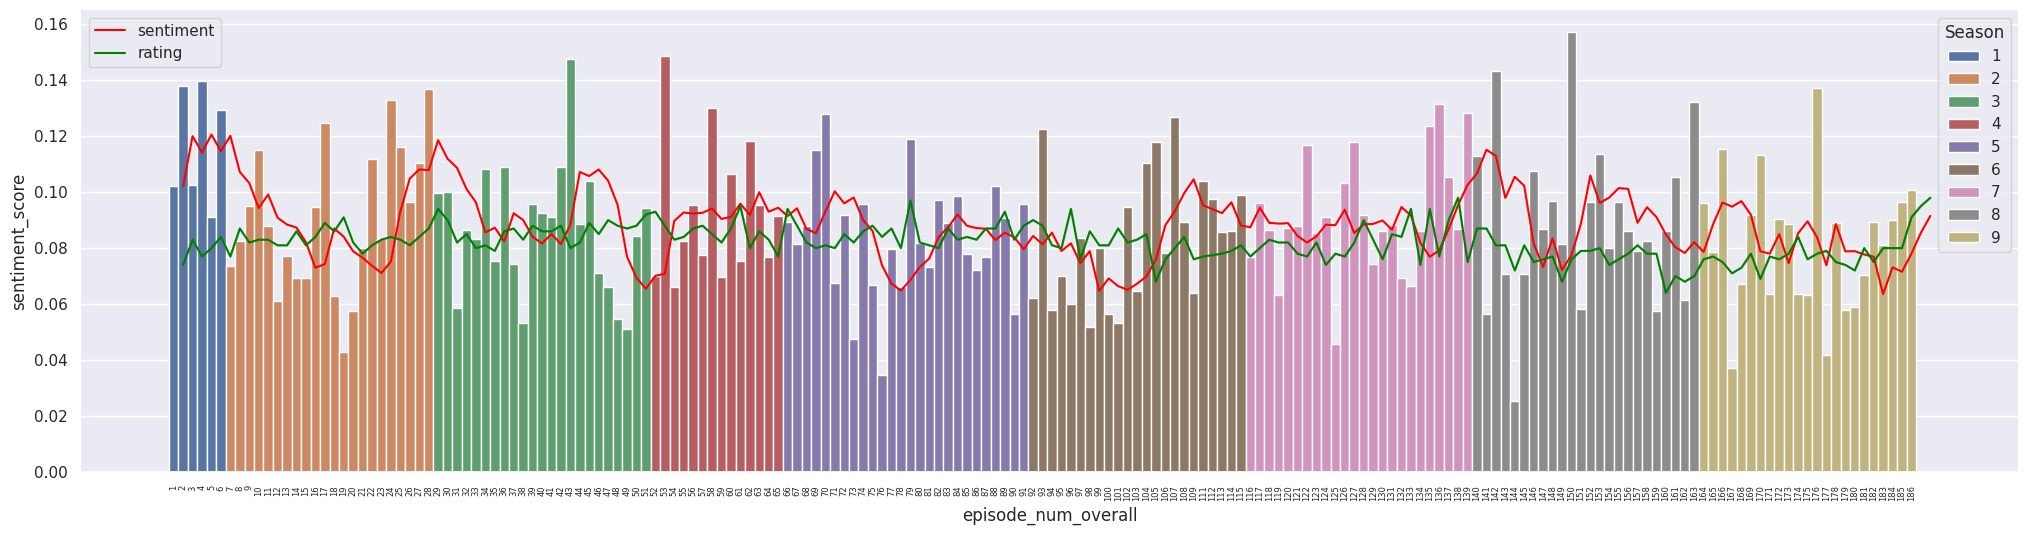

In [364]:
# check if there are some easy patterens between sentiment and rating
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

fig, ax = plt.subplots(figsize=(25, 6))
sns.barplot(data=sentiment_by_episode, x='episode_num_overall', y='sentiment_score', width=1, hue='season', dodge=False, ax=ax)
bar_legend = ax.legend(title='Season')
sns.lineplot(data=sentiment_by_episode, x='episode_num_overall', y='rolling_avg', color='red', label='sentiment', ax=ax)
sns.lineplot(data=office_df, x='episode_num_overall', y=office_df['rating']*0.01, color='green', label='rating', ax=ax)
plt.xticks(rotation=90, fontsize=6)

# Create a second legend for the line plots and specify its location
line_handles, line_labels = ax.get_legend_handles_labels()
ax.legend(line_handles[:2], line_labels[:2], loc='upper left')

# Add the bar plot legend back to the axis
ax.add_artist(bar_legend)

sns.despine(right=True, left=True)
plt.show()

In [341]:
sns.lineplot(data=office_df, x='episode_num_overall', y=office_df['rating']*0.001, color='red', ax=ax)

<Axes: xlabel='episode_num_overall', ylabel='sentiment_score'>

In [342]:
pd.DataFrame(office_df.groupby(by=['season', 'episode'])['speaker'].value_counts()).unstack(fill_value=0).reset_index()

season episode speaker                                                 \
speaker                   Andy Angela Dwight Erin Jim Kevin Michael Oscar Pam   
0            1       1       0      1     29    0  36     1      81     3  40   
1            1       2       0      4     17    0  25     8      75    13  12   
2            1       3       0      5     62    0  42     6      55     9  32   
3            1       4       0      7     47    0  49     3      68    14  22   
4            1       5       0      3     25    0  21     1     104     2  14   
..         ...     ...     ...    ...    ...  ...  ..   ...     ...   ...  ..   
180          9      19      31      2     58   10  15     5       0     7   9   
181          9      20      39     16     21   16  17    10       0     2  22   
182          9      21      68     30     54    9  63    13       0    19  30   
183          9      22      44     39     87   22  89    30       0    28  34   
184          9      23      31     23     76   11  73    31       2    18  45   

              
speaker Ryan  
0          8  
1          4  
2          1  
3          4  
4          8  
..       ...  
180        0  
181        0  
182        0  
183        0  
184       15  

[185 rows x 12 columns]

In [343]:
# Group by 'season', 'episode', and 'speaker', and calculate the value counts
speaker_counts = office_df.groupby(['season', 'episode', 'speaker']).size().reset_index(name='count')

# Pivot the DataFrame to get 'speaker' as columns and 'season' and 'episode' as the index
speaker_counts_pivot = speaker_counts.pivot(index=['season', 'episode'], columns='speaker', values='count')

# Fill NaN values with 0 for missing speaker counts
speaker_counts_pivot.fillna(0, inplace=True)

# Reset the index to get 'season' and 'episode' as columns instead of index
speaker_counts_pivot = speaker_counts_pivot.reset_index().rename_axis(None, axis=1)

In [344]:
speaker_counts_pivot

,season,episode,Andy,Angela,Dwight,Erin,Jim,Kevin,Michael,Oscar,Pam,Ryan
0,1,1,0.0,1.0,29.0,0.0,36.0,1.0,81.0,3.0,40.0,8.0
1,1,2,0.0,4.0,17.0,0.0,25.0,8.0,75.0,13.0,12.0,4.0
2,1,3,0.0,5.0,62.0,0.0,42.0,6.0,55.0,9.0,32.0,1.0
3,1,4,0.0,7.0,47.0,0.0,49.0,3.0,68.0,14.0,22.0,4.0
4,1,5,0.0,3.0,25.0,0.0,21.0,1.0,104.0,2.0,14.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
180,9,19,31.0,2.0,58.0,10.0,15.0,5.0,0.0,7.0,9.0,0.0
181,9,20,39.0,16.0,21.0,16.0,17.0,10.0,0.0,2.0,22.0,0.0
182,9,21,68.0,30.0,54.0,9.0,63.0,13.0,0.0,19.0,30.0,0.0
183,9,22,44.0,39.0,87.0,22.0,89.0,30.0,0.0,28.0,34.0,0.0


In [345]:
# Group by 'season', 'episode', and 'speaker', and calculate mean sentiment for episode
speaker_sentiment = office_df.groupby(['season', 'episode', 'speaker'])['sentiment_score'].mean().reset_index(name='sentiment_score')

# Pivot the DataFrame to get 'speaker' as columns and 'season' and 'episode' as the index
speaker_sentiment_pivot = speaker_sentiment.pivot(index=['season', 'episode'], columns='speaker', values='sentiment_score')

# Fill NaN values with 0 for missing speaker counts
speaker_sentiment_pivot.fillna(0, inplace=True)
speaker_sentiment_pivot = speaker_sentiment_pivot.add_suffix('_sentiment')

# Reset the index to get 'season' and 'episode' as columns instead of index
speaker_sentiment_pivot = speaker_sentiment_pivot.reset_index().rename_axis(None, axis=1)

In [346]:
speaker_sentiment_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             185 non-null    int64  
 1   episode            185 non-null    int64  
 2   Andy_sentiment     185 non-null    float64
 3   Angela_sentiment   185 non-null    float64
 4   Dwight_sentiment   185 non-null    float64
 5   Erin_sentiment     185 non-null    float64
 6   Jim_sentiment      185 non-null    float64
 7   Kevin_sentiment    185 non-null    float64
 8   Michael_sentiment  185 non-null    float64
 9   Oscar_sentiment    185 non-null    float64
 10  Pam_sentiment      185 non-null    float64
 11  Ryan_sentiment     185 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 17.5 KB


In [347]:
office_df.columns

Index(['season', 'episode', 'title', 'speaker', 'line', 'sentiment_score',
       'air_date', 'rating', 'votes', 'episode_num_overall', 'directed',
       'written', 'us_viewers'],
      dtype='object')

In [348]:
episodes_data = office_df.groupby(['season', 'episode'])[['title',
                'air_date', 'rating', 'votes', 'directed', 'written',
                'us_viewers']].first().reset_index()
episodes_data

,season,episode,title,air_date,rating,votes,directed,written,us_viewers
0,1,1,Pilot,2005-03-24,7.4,7006,Ken Kwapis,Ricky Gervais & Stephen Merchant and Greg Daniels,11200000.0
1,1,2,Diversity Day,2005-03-29,8.3,6902,Ken Kwapis,B. J. Novak,6000000.0
2,1,3,Health Care,2005-04-05,7.7,5756,Ken Whittingham,Paul Lieberstein,5800000.0
3,1,4,The Alliance,2005-04-12,8.0,5579,Bryan Gordon,Michael Schur,5400000.0
4,1,5,Basketball,2005-04-19,8.4,6183,Greg Daniels,Greg Daniels,5000000.0
...,...,...,...,...,...,...,...,...,...
180,9,19,Stairmageddon,2013-04-11,8.0,2961,Matt Sohn,Dan Sterling,3830000.0
181,9,20,Paper Airplane,2013-04-25,8.0,3040,Jesse Peretz,Halsted Sullivan & Warren Lieberstein,3250000.0
182,9,21,Livin' the Dream,2013-05-02,9.1,4448,Jeffrey Blitz,Niki Schwartz-Wright,3510000.0
183,9,22,A.A.R.M,2013-05-09,9.5,5930,David Rogers,Brent Forrester,4560000.0


In [349]:
michael = office_df[office_df['speaker'] == 'Michael']
dwight = office_df[office_df['speaker'] == 'Dwight']
jim = office_df[office_df['speaker'] == 'Jim']
pam = office_df[office_df['speaker'] == 'Pam']

In [485]:
final_df = episodes_data\
        .merge(sentiment_by_episode, how='left', on=['season', 'episode'])\
        .merge(speaker_counts_pivot, how='left', on=['season', 'episode'])\
        .merge(speaker_sentiment_pivot, how='left', on=['season', 'episode'])

In [351]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 184
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   season               185 non-null    int64  
 1   episode              185 non-null    int64  
 2   title                185 non-null    object 
 3   air_date             185 non-null    object 
 4   rating               185 non-null    float64
 5   votes                185 non-null    int64  
 6   directed             185 non-null    object 
 7   written              185 non-null    object 
 8   us_viewers           185 non-null    float64
 9   episode_num_overall  185 non-null    int64  
 10  sentiment_score      185 non-null    float64
 11  rolling_avg          185 non-null    float64
 12  Andy                 185 non-null    float64
 13  Angela               185 non-null    float64
 14  Dwight               185 non-null    float64
 15  Erin                 185 non-null    flo

In [366]:
final_df.columns

Index(['season', 'episode', 'title', 'air_date', 'rating', 'votes', 'directed',
       'written', 'us_viewers', 'episode_num_overall', 'sentiment_score',
       'rolling_avg', 'Andy', 'Angela', 'Dwight', 'Erin', 'Jim', 'Kevin',
       'Michael', 'Oscar', 'Pam', 'Ryan', 'Andy_sentiment', 'Angela_sentiment',
       'Dwight_sentiment', 'Erin_sentiment', 'Jim_sentiment',
       'Kevin_sentiment', 'Michael_sentiment', 'Oscar_sentiment',
       'Pam_sentiment', 'Ryan_sentiment'],
      dtype='object')

In [ ]:
# Filter rows with 'title' containing 'Parts' and divide the specified columns by 2
# as those are double episodes so there is supposedly twice as much dialog
columns_to_modify = ['Andy', 'Angela', 'Dwight', 'Erin', 'Jim', 'Kevin', 'Michael', 'Oscar', 'Pam', 'Ryan']
final_df.loc[final_df['title'].str.contains('Parts 1&2', case=False), columns_to_modify] = final_df.loc[final_df['title'].str.contains('Parts', case=False), columns_to_modify]/2

<Axes: >

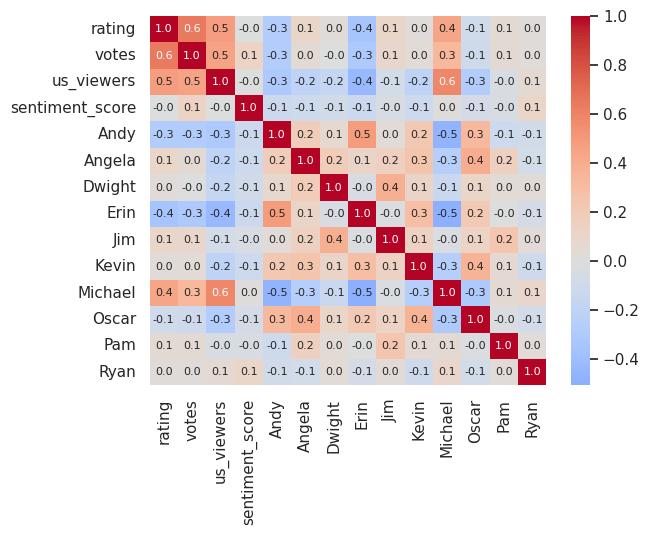

In [487]:
# calculate the correlation matrix on the numeric columns
corr = final_df[['rating', 'votes', 'us_viewers',
                'sentiment_score', 'Andy', 'Angela', 'Dwight', 'Erin', 'Jim',
                'Kevin', 'Michael', 'Oscar', 'Pam', 'Ryan']].corr()

# plot the heatmap
sns.heatmap(corr, annot=True, fmt=".1f", cmap="coolwarm", center=0, annot_kws={"size": 8})

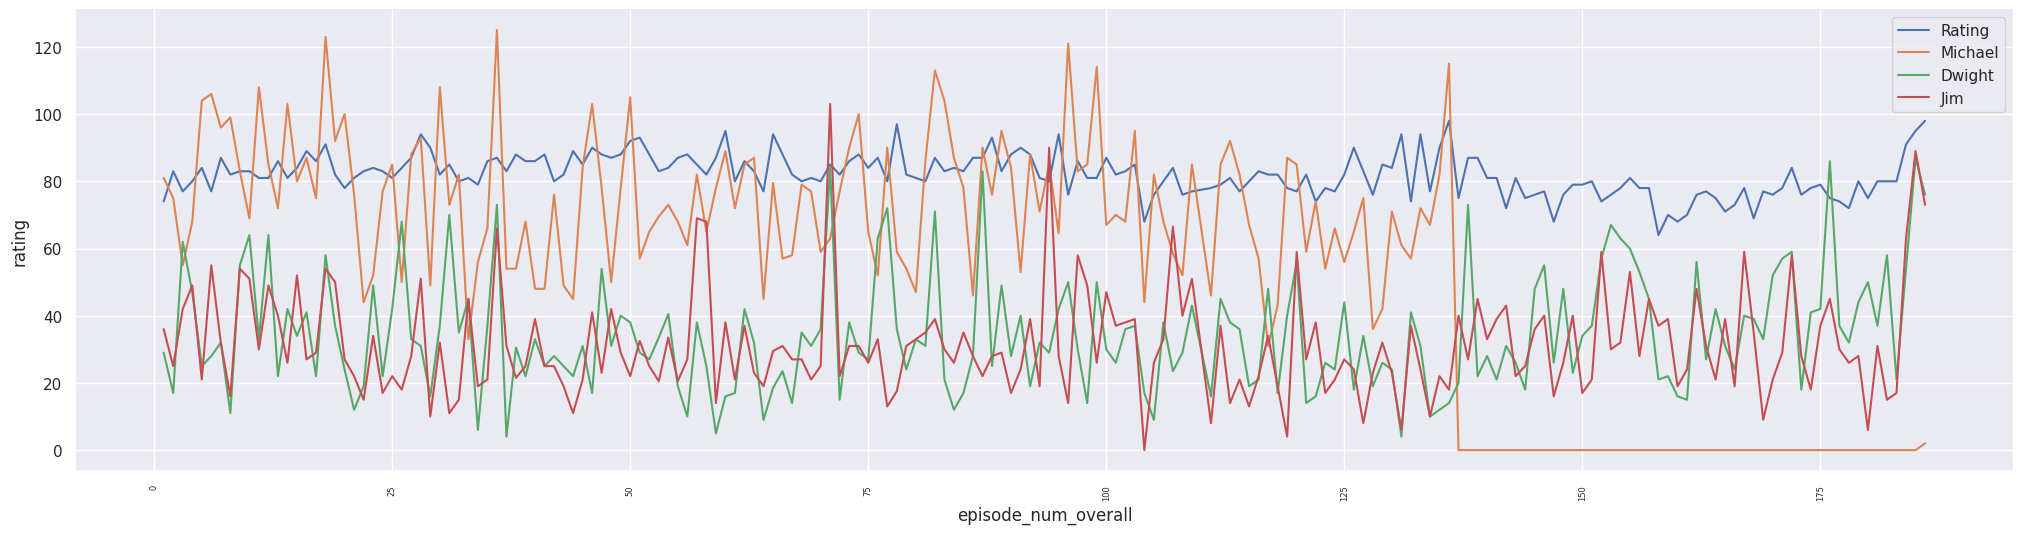

In [488]:
fig, ax = plt.subplots(figsize=(25, 6))

sns.lineplot(data=final_df, x='episode_num_overall', y=final_df['rating']*10, label='Rating', ax=ax)
sns.lineplot(data=final_df, x='episode_num_overall', y='Michael', label='Michael',ax=ax)
sns.lineplot(data=final_df, x='episode_num_overall', y='Dwight', label='Dwight', ax=ax)
sns.lineplot(data=final_df, x='episode_num_overall', y='Jim', label='Jim', ax=ax)
plt.xticks(rotation=90, fontsize=6)

sns.despine(right=True, left=True)
plt.show()

In [489]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots with 2 rows and 1 column (2 plots vertically stacked)
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1, row_heights=[0.7, 0.3])

# Add line plots to the first subplot (row=1, col=1)
fig.add_trace(go.Scatter(
    x=final_df['episode_num_overall'],
    y=final_df['Michael'],
    name='Michael',
    customdata=np.stack((final_df['season'],
                         final_df['episode'],
                         final_df['title'],
                         final_df['rating']), axis=-1),
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=final_df['episode_num_overall'],
    y=final_df['Dwight'],
    name='Dwight',
    customdata=np.stack((final_df['season'],
                         final_df['episode'],
                         final_df['title'],
                         final_df['rating']), axis=-1),
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=final_df['episode_num_overall'],
    y=final_df['Jim'],
    name='Jim',
    customdata=np.stack((final_df['season'],
                         final_df['episode'],
                         final_df['title'],
                         final_df['rating']), axis=-1),
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=final_df['episode_num_overall'],
    y=final_df['Pam'],
    name='Pam',
    customdata=np.stack((final_df['season'],
                         final_df['episode'],
                         final_df['title'],
                         final_df['rating']), axis=-1),
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=final_df['episode_num_overall'],
    y=final_df['Andy'],
    name='Andy',
    customdata=np.stack((final_df['season'],
                         final_df['episode'],
                         final_df['title'],
                         final_df['rating']), axis=-1),
), row=1, col=1)

# Add bar chart to the second subplot (row=2, col=1)
fig.add_trace(go.Bar(
    x=final_df['episode_num_overall'],
    y=final_df['rating'],
    name='Rating',
    customdata=np.stack((final_df['season'],
                         final_df['episode'],
                         final_df['title'],
                         final_df['rating']), axis=-1),
), row=2, col=1)

# Update hover template for both subplots
fig.update_traces(hovertemplate="<br>".join(['Season: %{customdata[0]}',
                                            'Episode: %{customdata[1]}',
                                            'Title: %{customdata[2]}',
                                            'Rating: %{customdata[3]}']), selector=dict(type='scatter'))

fig.update_traces(hovertemplate="<br>".join(['Season: %{customdata[0]}',
                                            'Episode: %{customdata[1]}',
                                            'Title: %{customdata[2]}',
                                            'Rating: %{customdata[3]}']), selector=dict(type='bar'))

# Update layout for both subplots
fig.update_layout(
    title_text='Count of lines per character in episodes',
    xaxis=dict(title=''),
    yaxis=dict(title='Count of lines in episode'),
    xaxis2=dict(title='Episode'),
    yaxis2=dict(title='Rating')
)

# Update the height of the second subplot to make it smaller
fig.update_layout(height=800)

fig.show()



In [94]:
# that's what she said
thats_what = lines_raw[lines_raw['line'].str.contains('what she said', case=False)]

# setup
setup = lines_raw.loc[lines_raw.index[thats_what.index-1]].reset_index(drop=True).rename(columns={'line':'setup', 'speaker':'setup_speaker'})
thats_what = thats_what.reset_index(drop=True)
thats_what[['setup', 'setup_speaker']] = setup[['setup', 'setup_speaker']]
thats_what

,season,episode,title,scene,speaker,line,Unnamed: 6,setup,setup_speaker
0,2,2,Sexual Harassment,306,Michael,That's what she said. Pam?,NaN,"No, thanks. I'm good.",Jim
1,2,2,Sexual Harassment,316,Jim,Does that include 'That's What She Said'?,NaN,"Attention, everyone! Hello! Ah, yes! I just wa...",Michael
2,2,2,Sexual Harassment,316,Michael,THAT'S WHAT SHE SAID!,NaN,Wow! That is really hard. You really think you...,Jim
3,2,10,Christmas Party,621,Michael,"A, that's what she said, and B, I wanted it to...",NaN,"Well, sort of. Why did you get it so big?",Kevin
4,2,12,The Injury,752,Dwight,That's what she said.,NaN,Does the skin look red and swollen?,Doctor
5,2,17,Dwight's Speech,953,Michael,That's what she said!,NaN,I have a ton of stuff to do for the wedding. A...,Pam
6,2,21,Conflict Resolution,1128,Michael,"That's what she said. The thing is, Angela......",NaN,You already did me.,Angela
7,3,1,Gay Witch Hunt,1264,Michael,I am glad that today spurred social change. Th...,NaN,We are not in the playground anymore. There ar...,Michael
8,3,10,A Benihana Christmas (Parts 1&2),1683,Michael,Oh. That's what she said.,NaN,"Thanks! I, I wanna give you something.",Second Cindy
9,3,13,Traveling Salesmen,1781,Dwight,That's what she said.,NaN,"Ok, you know what? I want you to think about y...",Michael


In [ ]:
lines_raw

In [71]:
from itertools import combinations

speaker_scene_counts = lines_raw.groupby(['scene', 'speaker']).size().reset_index().drop(columns=0)
speaker_pairs = pd.DataFrame(speaker_scene_counts.groupby('scene')['speaker'].unique())

# Get all possible combinations of speakers in each scene
combinations_list = [list(combinations(names, 2)) for names in speaker_pairs['speaker']]

# Flatten the list of combinations
all_combinations = [item for sublist in combinations_list for item in sublist]

# Count the occurrences of each pair in the list
pair_counts = pd.Series(all_combinations).value_counts().reset_index()
pair_counts.columns = ['Speaker Pair', 'Count']

# Display the result
print(pair_counts)

                     Speaker Pair  Count
0                      (Jim, Pam)    759
1               (Dwight, Michael)    664
2                   (Dwight, Jim)    644
3                  (Michael, Pam)    496
4                  (Jim, Michael)    466
...                           ...    ...
3666      (Front Desk Clerk, Jim)      1
3667      (Front Desk Clerk, Pam)      1
3668   (Dwight, Front Desk Clerk)      1
3669  (Front Desk Clerk, Michael)      1
3670             (Stanley, Woman)      1

[3671 rows x 2 columns]


In [57]:
from itertools import combinations
# Group by scene and get the unique speakers in each scene
speaker_pairs = df.groupby('scene')['speaker'].unique().reset_index()

# Get all possible combinations of speakers in each scene
combinations_list = [list(combinations(names, 2)) for names in speaker_pairs['speaker']]

# Flatten the list of combinations
all_combinations = [item for sublist in combinations_list for item in sublist]

# Count the occurrences of each pair in the list
pair_counts = pd.Series(all_combinations).value_counts().reset_index()
pair_counts.columns = ['Speaker Pair', 'Count']

# Display the result
print(pair_counts)


              Speaker Pair  Count
0           (Jim, Michael)      2
1           (Michael, Pam)      2
2           (Jan, Michael)      2
3            (Dwight, Jim)      1
4        (Dwight, Michael)      1
5               (Jan, Pam)      1
6            (Jan, Michel)      1
7       (Jan, Todd Packer)      1
8        (Michael, Michel)      1
9   (Michael, Todd Packer)      1
10   (Michel, Todd Packer)      1
11      (Phyllis, Stanley)      1
12         (Angela, Kevin)      1


In [61]:
df

,scene,speaker
0,1,Jim
1,1,Michael
2,2,Michael
3,3,Michael
4,3,Pam
5,4,Michael
6,5,Dwight
7,6,Jim
8,7,Dwight
9,7,Jim
